<a href="https://colab.research.google.com/github/sadrakhamoshi/DeepLearning-OCR/blob/main/DeepLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
# !pip install trdg -q

# Data Generator

In [ ]:
from PIL import Image, ImageDraw
# only for 16 number cards
def create_card_num():
  return "".join(["".join([str(np.random.randint(10)) for _ in range(4)]) for _ in range(4)])

def create_card_image(img_shape=(200,30), back_color = (73,109,137),start_text_pos=(10,10),text_color=(255,255,255)):

  img = Image.new('RGB',img_shape,color = back_color)
  d = ImageDraw.Draw(img)
  card_num = create_card_num()
  d.text(start_text_pos,card_num,fill=text_color)

  return img,card_num

def create_data_set(n=1000):
  X=[]
  y=[]

  for _ in range(n):
    d,l = create_card_image()
    X.append(d)
    y.append(l)

  return X , y



In [ ]:
X ,y = create_data_set(30000)

In [ ]:
X_v ,y_v = create_data_set(30000)

In [ ]:
len(X),len(y)

(1000, 1000)

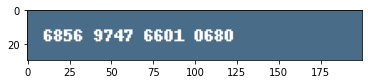

6856 9747 6601 0680


In [ ]:
plt.imshow(X[3])
plt.show()
print(y[3])

# dfdfdf

In [ ]:
font_path = '/content/CREDC___.ttf'
from typing import List
def credit_card_img(data_nums, backgrounds : List =None, font_color : List =None):
    x = []
    y = []
    padding_w, padding_h = (10, 10)
    font = ImageFont.truetype(font_path)     
    for _ in range(data_nums):
      txt = create_card_num()
      w, h = font.getsize(txt)
      ### TODO
      # set color of background and text

      img = Image.new('RGB', (w + padding_w, h + padding_h), color= (205,109,137))
      d = ImageDraw.Draw(img)
      d.text((padding_w/2 , padding_h/2), txt, fill=(255,255,255), font=font, align='center')
      x.append(img)
      y.append(txt)

    return x, y

x, y = credit_card_img(16)


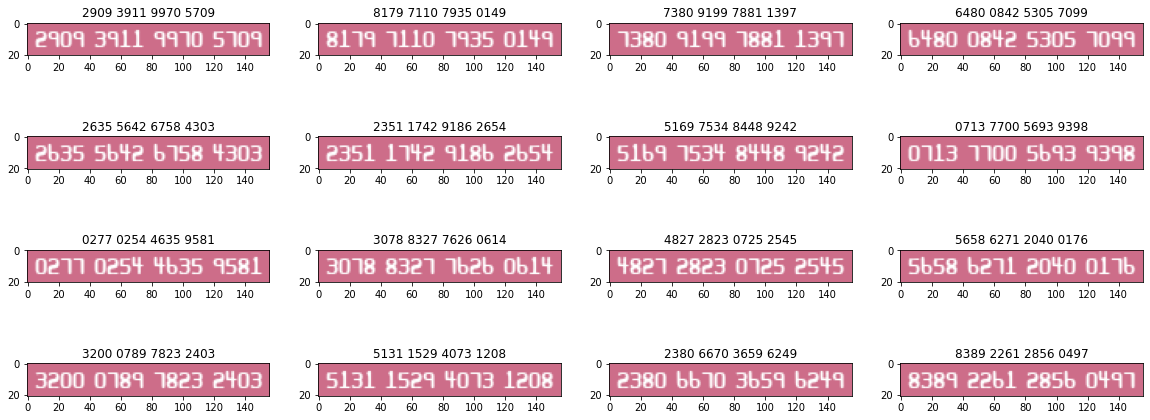

In [ ]:
def plot_data(x, y):
    plt.figure(figsize=(20,8))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x[i])
        plt.title(y[i])
    
    plt.show()

plot_data(x, y)

In [ ]:
# image data generator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

In [ ]:
def identification_card_img(data):
    pass

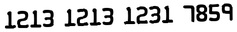

In [ ]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)
generator = GeneratorFromStrings(
    ['1213 1213 1231 7859', 'Test2', 'Test3'],
    random_blur=False,
    background_type=1,
    text_color='#000000',
    fonts=['/content/CREDC___.ttf', '/content/Far_Bank.ttf',  ],
    skewing_angle=3, random_skew=True,
    margins=(3,3,3,3)
    
)

a = generator.next()
img = a[0]
img

In [ ]:
img = img.convert("RGB")
datas = img.getdata()

# new_image_data = []
# for item in datas:
#     if item[0] in list(range(211, 256)):
#         new_image_data.append((65, 150, 0))    
#     else:
#         new_image_data.append(item)       

# img.putdata(new_image_data)
# img

253

In [ ]:
font_path = '/content/OCRARegular.ttf'
font = ImageFont.truetype(font_path)
text = '1413 1260 1231 7859'
w, h = font.getsize(text)
w,h

(133, 8)

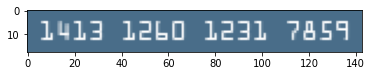

In [ ]:
img = Image.new('RGB', (w +10,h+10), color = (73,109,137))
d = ImageDraw.Draw(img, mode='RGBA')
d.text((5,5), text, fill=(255,255,255), font=font, align='center')
plt.imshow(img)

# Model

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/text/mjsynth.tar.gz

--2022-01-21 11:04:44--  https://thor.robots.ox.ac.uk/~vgg/data/text/mjsynth.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10678411583 (9.9G) [application/octet-stream]
Saving to: ‘mjsynth.tar.gz’

mjsynth.tar.gz        0%[                    ]   4.85M   100KB/s    eta 28h 51m^C


In [ ]:
train_data_path  = '/content/drive/MyDrive/DataSet/new_national_card/'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageDraw
import os
train = []
label=[]
for ei in  os.listdir(train_data_path):
  if ei!= '.ipynb_checkpoints':
    train.append(Image.open(train_data_path + ei))
    label.append(ei[:-4])

In [ ]:
len(train)

8000

In [ ]:
!ls '/content/drive/MyDrive/credit_card1/' | wc -l

ls: cannot access '/content/drive/MyDrive/credit_card1/': No such file or directory
0


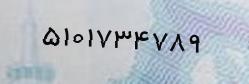

In [ ]:
train[2]

In [ ]:
N = 7000
X = train[:N]
l_x = label[:N]
V = train[N:]
l_v = label[N:]

In [ ]:
5101734789

# CRNN

##CRNN

In [ ]:
train_size = len(X)
valid_size= len(V)
img_shape=(256, 64, 1)
alphabets=u"۰۱۲۳۴۵۶۷۸۹"
num_of_characters = len(alphabets) + 1
max_str_len=16
num_of_timestamps=32

In [ ]:
import cv2
from PIL import ImageOps
def preprocess(img):
    img = ImageOps.grayscale(img)
    img = np.array(img)
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # blank white image
    
    # crop
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

def preprocess_image(img):
  return np.array(img.resize((256,64)).convert('L'))



In [ ]:
def preprocess_train(data,shape=(256,64)):
    res_data=[]
    for i,d in enumerate(data):
      img = preprocess(d)
      img = img/255
      res_data.append(img)
    return np.array(res_data).reshape(-1, shape[0], shape[1], 1)
    



In [ ]:
valid_x = preprocess_train(V)
train_x = preprocess_train(X)

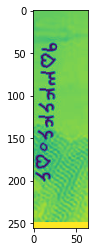

In [ ]:
plt.imshow(valid_x[-2][:,:,0])

In [ ]:
def label_to_num(label,alphabets=u"۰۱۲۳۴۵۶۷۸۹"):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num,alphabets=u"۰۱۲۳۴۵۶۷۸۹"):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

def preprocess_label(data,alphabets=u"۰۱۲۳۴۵۶۷۸۹",max_str_len=16,num_of_timestamps=32):
  num_of_characters = len(alphabets) + 1
  train_size = len(data)
  train_y = np.ones([train_size, max_str_len]) * -1
  train_label_len = np.zeros([train_size, 1])
  train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
  train_output = np.zeros([train_size])
  for i in range(train_size):
    train_label_len[i] = len(data[i])
    train_y[i, 0:len(data[i])]= label_to_num(data[i])
  return train_y,train_input_len,train_label_len,train_output

In [ ]:
train_y, train_input_len, train_label_len,train_output = preprocess_label(l_x)

In [ ]:
print('True label : ',l_x[10] , '\ntrain_y : ',train_y[10],'\ntrain_label_len : ',train_label_len[10], 
      '\ntrain_input_len : ', train_input_len[10])

True label :  ۳۹۸۱۴۴۵۲۳۱ 
train_y :  [ 3.  9.  8.  1.  4.  4.  5.  2.  3.  1. -1. -1. -1. -1. -1. -1.] 
train_label_len :  [10.] 
train_input_len :  [30.]


In [ ]:
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras import layers
from tensorflow import keras

In [ ]:
## Model
input_data = Input(shape=img_shape, name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 256, 64, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 256, 64, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 64, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 128, 32, 32)       0         
                                                                 
 conv2 (Conv2D)              (None, 128, 32, 64)       18496     
                                                             

In [ ]:
# the ctc loss function
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    # y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:
input_data.shape,labels.shape,input_length.shape,label_length.shape

(TensorShape([None, 256, 64, 1]),
 TensorShape([None, 16]),
 TensorShape([None, 1]),
 TensorShape([None, 1]))

In [ ]:
train_x.shape

(7000, 256, 64, 1)

In [ ]:
# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.001))

hist=model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                epochs=200, batch_size=512)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
14/14 [==============================] - 31s 978ms/step - loss: 27.4281
Epoch 2/200
14/14 [==============================] - 10s 692ms/step - loss: 24.9960
Epoch 3/200
14/14 [==============================] - 10s 686ms/step - loss: 24.9297
Epoch 4/200
14/14 [==============================] - 10s 696ms/step - loss: 24.9035
Epoch 5/200
14/14 [==============================] - 10s 697ms/step - loss: 24.8666
Epoch 6/200
14/14 [==============================] - 10s 699ms/step - loss: 24.7831
Epoch 7/200
14/14 [==============================] - 10s 701ms/step - loss: 24.6592
Epoch 8/200
14/14 [==============================] - 10s 735ms/step - loss: 24.4841
Epoch 9/200
14/14 [==============================] - 10s 696ms/step - loss: 24.3965
Epoch 10/200
14/14 [==============================] - 10s 701ms/step - loss: 23.5916
Epoch 11/200
14/14 [==============================] - 10s 701ms/step - loss: 22.9517
Epoch 12/200
14/14 [==============================] - 10s 702ms/step - los

In [ ]:

hist=model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                epochs=20, batch_size=128)

Epoch 1/20
55/55 [==============================] - 12s 221ms/step - loss: 0.0973
Epoch 2/20
55/55 [==============================] - 11s 202ms/step - loss: 0.0766
Epoch 3/20
55/55 [==============================] - 11s 203ms/step - loss: 0.0525
Epoch 4/20
55/55 [==============================] - 11s 200ms/step - loss: 0.0349
Epoch 5/20
55/55 [==============================] - 11s 204ms/step - loss: 0.0249
Epoch 6/20
55/55 [==============================] - 11s 201ms/step - loss: 0.0276
Epoch 7/20
55/55 [==============================] - 11s 207ms/step - loss: 0.0510
Epoch 8/20
55/55 [==============================] - 11s 201ms/step - loss: 0.0546
Epoch 9/20
55/55 [==============================] - 11s 203ms/step - loss: 0.0479
Epoch 10/20
55/55 [==============================] - 11s 206ms/step - loss: 0.0467
Epoch 11/20
55/55 [==============================] - 11s 198ms/step - loss: 0.0433
Epoch 12/20
55/55 [==============================] - 11s 201ms/step - loss: 0.0503
Epoch 13/20
5

In [ ]:
model.save('model.h5')
model_final.save('model_final.h5')



In [ ]:
model_final.save('/content/drive/MyDrive/model_final_new_national_card.h5')
model.save('/content/drive/MyDrive/model_new_national_card.h5')


In [ ]:
model_final.save('/content/drive/MyDrive/model_final_new_national_card.h5')

In [ ]:
!pip install plot-keras-history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8794 sha256=2bb6f94b8e41e1de114c65b9d82776c505bc10c08408a1d84f329acf86c2e7e7
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7878 sha256=5d76f5c46a3ddc17d60b534bbfbdb2882679a2b84bfeee6b322c9f28b735df5e
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4588 sha256=0f0e65de0cde151d9455170f51a4a5038509abb5936c62a3181babe12e29d438
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb81d4f090>)

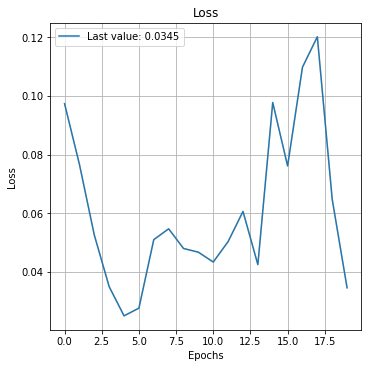

In [ ]:
from plot_keras_history import plot_history
plot_history(hist)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/model_new_national_card.h5')


In [ ]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
p =prediction[-2]
np.mean(valid_x[-2])

0.738336301317402

In [ ]:
t = y_true[:10]

NameError: ignored

In [ ]:
sum([y_true[i]==prediction[i][:10] for i in range(len(prediction))])/len(prediction)
# for i in range(1):
#     a = t[i][:10]
#     b = p[i][:10]
#     if a==b:
#         print(True)    

0.959

In [ ]:
len(y_v[0])

NameError: ignored

In [ ]:
y_v = l_v

In [ ]:
y_true = y_v[0:valid_size]
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 98.72%
Correct words predicted      : 0.00%


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


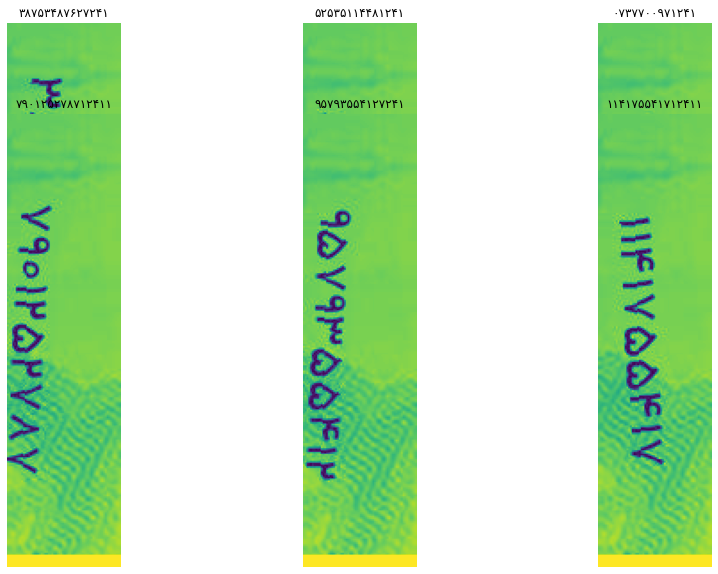

In [ ]:
test = valid_x[:10]

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    image = test[i]
    plt.imshow(image[:,:,0])
    
    # image = preprocess(image)
    # image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

# inittialize model cnn


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSet/train_data',
    target_size=((400,100)),
    batch_size=128,
    class_mode='categorical')

TypeError: ignored

In [ ]:
input_shape = train_generator.next()[0][0].shape

In [ ]:
!cp -r '/content/drive/MyDrive/DataSet/credit_card2' '/content/drive/MyDrive/DataSet/train_data'
!cp -r '/content/drive/MyDrive/DataSet/new_national_card' '/content/drive/MyDrive/DataSet/train_data'
!cp -r '/content/drive/MyDrive/DataSet/old_national_card' '/content/drive/MyDrive/DataSet/train_data'


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os
import numpy as np
credit_path = '/content/drive/MyDrive/DataSet/credit_card2/'
new_national_path = '/content/drive/MyDrive/DataSet/new_national_card/'
ole_national_path = '/content/drive/MyDrive/DataSet/old_national_card/'
class_credit = 0
class_new_national = 1
class_old_national = 2

def preprocess_image_class(img):
  return np.array(img.resize((100,400)))


def _get_data(path, y, size=5000):
    names = os.listdir(path)[:size]
    x = []
    y = np.ones(size) * y
    for n in names:
        img = Image.open(path+n)

        x.append(preprocess_image_class(img))

    return np.array(x), y

# x_credit, y_credit = _get_data(credit_path, class_credit)
# x_new_nationl, y_new_national = _get_data(new_national_path, class_new_national)
# x_old_nationl, y_old_national = _get_data(ole_national_path, class_old_national)


In [ ]:
x_credit.shape, y_credit.shape

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_credit[0])

In [ ]:
X_train = np.concatenate((x_credit, x_new_nationl, x_old_nationl), axis=0)
Y_train = np.concatenate((y_credit, y_new_national,y_old_national), axis=0)

X_train.shape, Y_train.shape

In [ ]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train, Y_train = unison_shuffled_copies(X_train, Y_train)
X_train.shape, Y_train.shape


In [ ]:
import tensorflow as tf
x = X_train.copy()
y = tf.keras.utils.to_categorical(Y_train)
x.shape, y.shape



In [ ]:
model = tf.keras.Sequential( 
  [ 
    tf.keras.Input(shape=input_shape), 
    layers.Conv2D(64, kernel_size=(7, 7),activation='relu'), 
    layers.Conv2D(128, kernel_size=(5, 5),activation='relu'), 
    layers.MaxPooling2D(pool_size=(2, 2)), 
    layers.Conv2D(256, kernel_size=(5, 5),activation='relu'), 
    layers.MaxPooling2D(pool_size=(2, 2)), 
    layers.Dropout(0.2), 
    layers.Conv2D(256, kernel_size=(3, 3),activation='relu'), 
    layers.MaxPooling2D(pool_size=(4, 4)),    
    layers.Flatten(), 
    layers.Dense(3, activation="softmax"), 
  ] 
)



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy', ])

In [ ]:
his = model.fit_generator(train_generator, steps_per_epoch=218, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
218/218 [==============================] - 445s 2s/step - loss: 0.2182 - accuracy: 0.9214
Epoch 2/10
 77/218 [=========>....................] - ETA: 4:13 - loss: 0.0041 - accuracy: 0.9991

KeyboardInterrupt: ignored

In [ ]:
credit_path = '/content/drive/MyDrive/DataSet/credit_card2/'
new_national_path = '/content/drive/MyDrive/DataSet/new_national_card/'
ole_national_path = '/content/drive/MyDrive/DataSet/old_national_card/'
class_credit = 0
class_new_national = 1
class_old_national = 2
x_credit_test, y_credit_test = _get_data('/content/drive/MyDrive/DataSet/credit_card1/', class_credit, 100)
x_credit_test = x_credit_test/255

In [ ]:
# y_true = tf.keras.utils.to_categorical(y_credit_test)
prediction = model.predict(x_credit_test)

In [ ]:
np.argmax(prediction, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.save('/content/drive/MyDrive/init_model.h5')